In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#task add one more class 4,5,6 as neutral comments, retrain and evaluate the model

In [4]:
import pandas as pd
df= pd.DataFrame()

df = pd.read_csv('/content/drive/MyDrive/Deep Learning/LSTM lab/texts_train.txt', sep="\t", encoding='UTF-8',header=0)
df['grade'] = pd.read_csv('/content/drive/MyDrive/Deep Learning/LSTM lab/scores_train.txt', sep="\t", encoding='UTF-8',header=0)
df.columns = ['comment', 'grade']
print(df.head())

                                             comment  grade
0  думал, что будет лучше идея очень интересна - ...      7
1  с творчеством Головачева я познакомился посред...     10
2  то-то я и в большое неудовольствие прочитал "А...      5
3  как мне показалось местами сильно смахивает на...      6
4  от первой части книги просто оторваться не мог...      9


In [5]:
import numpy as np
unique_grades = np.sort(df['grade'].unique())
print('all unique grades: ',unique_grades)
unique_grades  = [1,2,3,8,9,10]
print('new unique grades: ',unique_grades)

all unique grades:  [ 1  2  3  4  5  6  7  8  9 10]
new unique grades:  [1, 2, 3, 8, 9, 10]


In [6]:
df_new = pd.DataFrame()
comment = []
grade = []

for grades in unique_grades:
    counter = 0
    for i in range(len(df)):
    #for i in range(000/(len(unique_grades))):
        if (counter<300):
            if (grades == df['grade'][i]):
                comment.append(df['comment'][i])
                grade.append(df['grade'][i])
                counter = counter + 1
df_new['comment'] = comment
#Заменим значения оценок на 1,2,3
#Это облегчит подсчет ошибки
#1 - негативный отзыв
#2 - нейтральный
#3 - положительный
df_new['grade'] = grade
df_new['grade'] = df_new['grade'].replace(1, 0).replace(2, 0).replace(3, 0)
#df_new['grade'] =
df_new['grade'] = df_new['grade'].replace(10, 1).replace(9, 1).replace(8, 1)
print('new unique grades: ',np.sort(df_new['grade'].unique()))
print(df_new.head())

new unique grades:  [0 1]
                                             comment  grade
0  Хотелось долго плеваться после того как я с тр...      0
1  ИМХО, в серии о Свароге Бушков исписался. Если...      0
2  Много был наслышан об этом авторе и вот взялся...      0
3  Да, тяжело читать безграмотную фэнтези. Хотя, ...      0
4  Попытка свести сюжет предыдущих книг в единое ...      0


In [7]:
df_new.to_csv('treeclasses_sorted_comments.csv', sep = '|') #save this dataset to csv

In [8]:
array_of_mean_thensors = []
grade = []
comment = []
uncomtiled_rows = 0
for i in range(len(df_new)):
    try:
        grade.append(df_new['grade'][i])
        comment.append(df_new['comment'][i])
    except:
        #in some cases, from my point of view, when comment is too large, the data has not processed, and it cause some errors
        uncomtiled_rows = uncomtiled_rows + 1
        #print('Too long or to short comment')

In [9]:
print(comment[0],' ',grade[0])

Хотелось долго плеваться после того как я с трудом осилил половину книги. На этом моё увлечения творчеством Никитина было закончено. Я даже не захотел читать уже купленную книгу ?Изгой? из любимого некогда цикла Трое из леса.   0


In [10]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
def preproccessing(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in punctuation])
    text = text.split(' ')
    #print ('Number of reviews :', len(text))
    return text

In [12]:
tokenized_corpus = [preproccessing(i) for i in comment ]

In [13]:
tokenized_corpus[:5]

[['хотелось',
  'долго',
  'плеваться',
  'после',
  'того',
  'как',
  'я',
  'с',
  'трудом',
  'осилил',
  'половину',
  'книги',
  'на',
  'этом',
  'моё',
  'увлечения',
  'творчеством',
  'никитина',
  'было',
  'закончено',
  'я',
  'даже',
  'не',
  'захотел',
  'читать',
  'уже',
  'купленную',
  'книгу',
  'изгой',
  'из',
  'любимого',
  'некогда',
  'цикла',
  'трое',
  'из',
  'леса'],
 ['имхо',
  'в',
  'серии',
  'о',
  'свароге',
  'бушков',
  'исписался',
  'если',
  'первые',
  'две',
  'книги',
  'еще',
  'читать',
  'интересно',
  'то',
  'остальное',
  'в',
  'общем',
  'сварога',
  'пора',
  'убивать'],
 ['много',
  'был',
  'наслышан',
  'об',
  'этом',
  'авторе',
  'и',
  'вот',
  'взялся',
  'прочесть',
  'сказать',
  'что',
  'книга',
  'разочаровала',
  '',
  'ничего',
  'не',
  'сказать',
  'смысловые',
  'ляпы',
  'на',
  'каждом',
  'шагу',
  'например',
  'команда',
  'огонь',
  'при',
  'стрельбе',
  'из',
  'луков',
  'в',
  'мире',
  'где',
  'нет',
 

In [14]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)
print(vocabulary)

['хотелось', 'долго', 'плеваться', 'после', 'того', 'как', 'я', 'с', 'трудом', 'осилил', 'половину', 'книги', 'на', 'этом', 'моё', 'увлечения', 'творчеством', 'никитина', 'было', 'закончено', 'даже', 'не', 'захотел', 'читать', 'уже', 'купленную', 'книгу', 'изгой', 'из', 'любимого', 'некогда', 'цикла', 'трое', 'леса', 'имхо', 'в', 'серии', 'о', 'свароге', 'бушков', 'исписался', 'если', 'первые', 'две', 'еще', 'интересно', 'то', 'остальное', 'общем', 'сварога', 'пора', 'убивать', 'много', 'был', 'наслышан', 'об', 'авторе', 'и', 'вот', 'взялся', 'прочесть', 'сказать', 'что', 'книга', 'разочаровала', '', 'ничего', 'смысловые', 'ляпы', 'каждом', 'шагу', 'например', 'команда', 'огонь', 'при', 'стрельбе', 'луков', 'мире', 'где', 'нет', 'индивидуального', 'огнестрельного', 'оружия', 'тд', 'громоздкий', 'вычурный', 'язык', 'отсутствие', 'концовки', 'путешествие', 'неизвестно', 'куда', 'зачем', 'слабая', 'мотивация', 'поступков', 'героев', 'гораздо', 'ниже', 'среднего', 'теперь', 'начинаю', 'пон

In [ ]:
len(vocabulary)

18894

In [ ]:
len(set(vocabulary))

18894

In [15]:
word2idx

{'хотелось': 0,
 'долго': 1,
 'плеваться': 2,
 'после': 3,
 'того': 4,
 'как': 5,
 'я': 6,
 'с': 7,
 'трудом': 8,
 'осилил': 9,
 'половину': 10,
 'книги': 11,
 'на': 12,
 'этом': 13,
 'моё': 14,
 'увлечения': 15,
 'творчеством': 16,
 'никитина': 17,
 'было': 18,
 'закончено': 19,
 'даже': 20,
 'не': 21,
 'захотел': 22,
 'читать': 23,
 'уже': 24,
 'купленную': 25,
 'книгу': 26,
 'изгой': 27,
 'из': 28,
 'любимого': 29,
 'некогда': 30,
 'цикла': 31,
 'трое': 32,
 'леса': 33,
 'имхо': 34,
 'в': 35,
 'серии': 36,
 'о': 37,
 'свароге': 38,
 'бушков': 39,
 'исписался': 40,
 'если': 41,
 'первые': 42,
 'две': 43,
 'еще': 44,
 'интересно': 45,
 'то': 46,
 'остальное': 47,
 'общем': 48,
 'сварога': 49,
 'пора': 50,
 'убивать': 51,
 'много': 52,
 'был': 53,
 'наслышан': 54,
 'об': 55,
 'авторе': 56,
 'и': 57,
 'вот': 58,
 'взялся': 59,
 'прочесть': 60,
 'сказать': 61,
 'что': 62,
 'книга': 63,
 'разочаровала': 64,
 '': 65,
 'ничего': 66,
 'смысловые': 67,
 'ляпы': 68,
 'каждом': 69,
 'шагу': 70,

In [16]:
idx2word

{0: 'хотелось',
 1: 'долго',
 2: 'плеваться',
 3: 'после',
 4: 'того',
 5: 'как',
 6: 'я',
 7: 'с',
 8: 'трудом',
 9: 'осилил',
 10: 'половину',
 11: 'книги',
 12: 'на',
 13: 'этом',
 14: 'моё',
 15: 'увлечения',
 16: 'творчеством',
 17: 'никитина',
 18: 'было',
 19: 'закончено',
 20: 'даже',
 21: 'не',
 22: 'захотел',
 23: 'читать',
 24: 'уже',
 25: 'купленную',
 26: 'книгу',
 27: 'изгой',
 28: 'из',
 29: 'любимого',
 30: 'некогда',
 31: 'цикла',
 32: 'трое',
 33: 'леса',
 34: 'имхо',
 35: 'в',
 36: 'серии',
 37: 'о',
 38: 'свароге',
 39: 'бушков',
 40: 'исписался',
 41: 'если',
 42: 'первые',
 43: 'две',
 44: 'еще',
 45: 'интересно',
 46: 'то',
 47: 'остальное',
 48: 'общем',
 49: 'сварога',
 50: 'пора',
 51: 'убивать',
 52: 'много',
 53: 'был',
 54: 'наслышан',
 55: 'об',
 56: 'авторе',
 57: 'и',
 58: 'вот',
 59: 'взялся',
 60: 'прочесть',
 61: 'сказать',
 62: 'что',
 63: 'книга',
 64: 'разочаровала',
 65: '',
 66: 'ничего',
 67: 'смысловые',
 68: 'ляпы',
 69: 'каждом',
 70: 'шагу',

In [17]:
comment_in_num = []
for sentence in tokenized_corpus:
    comment_in_num.append([word2idx[word] for word in sentence])

In [18]:
len(comment_in_num) == len(tokenized_corpus) == len(grade)

True

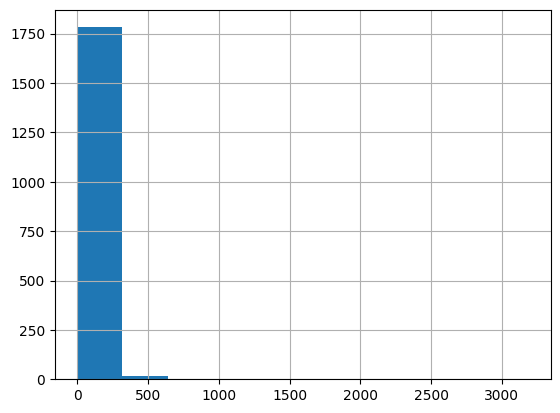

count    1800.000000
mean       38.240556
std        92.947441
min         1.000000
25%        10.000000
50%        21.000000
75%        38.000000
max      3187.000000
dtype: float64

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
comment_len = [len(x) for x in comment_in_num]
pd.Series(comment_len).hist()
plt.show()
pd.Series(comment_len).describe()

In [20]:
def pad_features(reviews_int, seq_length):
    #Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    features = np.zeros((len(reviews_int), seq_length), dtype = int)

    for i, review in enumerate(reviews_int):
        review_len = len(review)

        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]

        features[i,:] = np.array(new)

    return features

In [21]:
features = pad_features(comment_in_num, 200)

In [22]:
features

array([[    0,     0,     0, ...,    32,    28,    33],
       [    0,     0,     0, ...,    49,    50,    51],
       [    0,     0,     0, ...,    21,   105,   106],
       ...,
       [    0,     0,     0, ...,  2368, 18887,   393],
       [    0,     0,     0, ...,   152, 15676,  1402],
       [    0,     0,     0, ...,    35,    13,    77]])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(features),np.array(grade), test_size=0.20, random_state=42)

In [24]:
len(X_train)

1440

In [25]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
#train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
#test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
train_data = TensorDataset(torch.cuda.FloatTensor(X_train), torch.cuda.LongTensor(y_train))
test_data = TensorDataset(torch.cuda.FloatTensor(X_test), torch.cuda.LongTensor(y_test))
# dataloaders
batch_size = 30
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

<ipython-input-25-c819eed3e926>:6: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:83.)
  train_data = TensorDataset(torch.cuda.FloatTensor(X_train), torch.cuda.LongTensor(y_train))


In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([30, 200])
Sample input: 
 tensor([[    0.,     0.,     0.,  ...,    57., 18263.,  1022.],
        [    0.,     0.,     0.,  ...,  2044.,    57., 16853.],
        [    0.,     0.,     0.,  ..., 10157.,    21.,   583.],
        ...,
        [    0.,     0.,     0.,  ...,  7230.,  3639.,  9349.],
        [    0.,     0.,     0.,  ...,  4502.,  8335.,  9010.],
        [    0.,     0.,     0.,  ...,   223., 14302.,    65.]],
       device='cuda:0')

Sample label size:  torch.Size([30])
Sample label: 
 tensor([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 1], device='cuda:0')


![image.png](attachment:image.png)

<li>0. Tokenize : This is not a layer for LSTM network but a mandatory step of converting our words into tokens (integers)
<li>Embedding Layer: that converts our word tokens (integers) into embedding of specific size
<li>LSTM Layer: defined by hidden state dims and number of layers
<li>Fully Connected Layer: that maps output of LSTM layer to a desired output size
<li>Sigmoid Activation Layer: that turns all output values in a value between 0 and 1
<li>Output: Sigmoid output from the last timestep is considered as the final output of this network

In [26]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,
                            dropout=drop_prob, batch_first=True)

        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()

    def forward(self, x, hidden):
        batch_size = x.size(0)
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)

        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        out = self.dropout(lstm_out)
        out = self.fc(out)
        sig_out = self.sig(out)
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1]

        return sig_out, hidden

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data

        if torch.cuda.is_available():
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

        return hidden


In [27]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocabulary)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 200
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)


SentimentLSTM(
  (embedding): Embedding(18895, 200)
  (lstm): LSTM(200, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [28]:
import tqdm
# loss and optimization functions
lr=0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# training params


counter = 0
print_every = 10
clip=5 # gradient clipping
# move model to GPU, if available
train_on_gpu = True
if(train_on_gpu):
    net.cuda()

net.train()
losses = []
epochs = 5
# train for some number of epochs
for e in tqdm.tqdm (range(epochs)):
    # initialize hidden state
    h = net.init_hidden(batch_size)
    loss_ = []
    # batch loop
    for inputs, labels in train_loader:
        net.train()
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.cuda.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()
        loss_.append(loss.item())
    losses.append(np.mean(loss_))

100%|██████████| 5/5 [00:07<00:00,  1.48s/it]


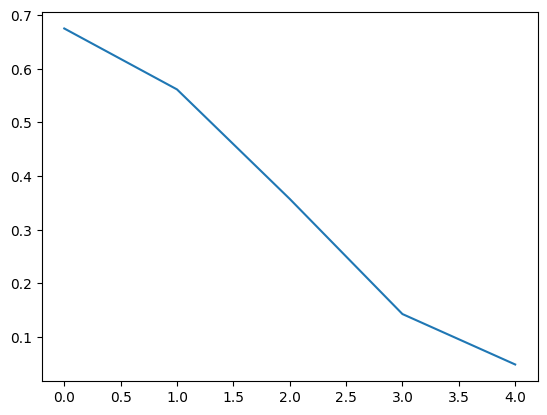

In [29]:
plt.plot(range(len(losses)), losses, label='train')

In [30]:
losses

[0.6750992474456629,
 0.5615441550811132,
 0.357491098344326,
 0.14289757946971804,
 0.04892101900865479]

In [31]:
test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()

    # get predicted outputs
    inputs = inputs.type(torch.cuda.LongTensor)
    output, h = net(inputs, h)

    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer

    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.913
Test accuracy: 0.681


In [32]:
def predict(net, test_review, sequence_length=200):

    net.eval()

    # tokenize review
    test_words = preproccessing(test_review)
    test_ints = []
    test_ints.append([word2idx[word] for word in test_words])
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    print(features)
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    batch_size = feature_tensor.size(0)

    # initialize hidden state
    h = net.init_hidden(batch_size)
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()

    # get the output from the model
    output, h = net(feature_tensor, h)

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))

    # print custom response
    if(pred.item()==1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")

In [33]:
predict(net, 'Ужасный фильм, мне не понравился, смотреть противно',200)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0 2698 27

In [34]:
predict(net, 'очень хорошая книга',200)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [35]:
predict(net, 'книга отстой можно в мусорку',200)

KeyError: 'мусорку'

In [36]:
predict(net, 'книга отстой? никогда не читайте',200)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  63 505 828
   21 583]]
Prediction value, pre-rounding: 0.138321
Negative review detected.


In [37]:
predict(net, 'книга супер',200)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [38]:
predict(net, 'гавно фильм',200)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [39]:
predict(net, 'очень хороший фильм',200)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   